### Importing Pandas for Data Wrangling

In [1]:
import pandas as pd

### Transforming the ABT

In [2]:
# Reading the CSV as a dataframe without indexing any column
df = pd.read_csv("DublinRental.csv")


# Checking the number of missing values in the dataframe
orig_miss_col = df.isna().any()
orig_miss_row = df.isna().any(axis=1).sum()
print(f"Checking the original number of missing values:\n{orig_miss_col}")
print(f"\nNumber of rows with atleast one missing value:\n{orig_miss_row}")


# Adding a Quarter Column and populating it (for analytics purposes)
# The quarter can be derived from the "Month" field but it needs to be converted into a datetime format
df["Quarter"] = None                                                               # Creating a new field
df.insert(0, "Quarter", df.pop("Quarter"))                                         # Repositioning the new column at the 0th index position
df["Quarter"] = (pd.to_datetime(df["Month"], format="%B %Y")).dt.quarter           # Deriving quarter from "Month" field by converting it into datetime format
df["Month"] = (pd.to_datetime(df["Month"], format="%B %Y")).dt.month_name()        # Keeping just the month name 

                             
# Price Field
df["Monthly Rental (EUR)"] = df["Price"].str.extract(r"(\d+[,.]?\d*)")              # Extracting the price from the "Price" field using Regex
df["Monthly Rental (EUR)"] = df["Monthly Rental (EUR)"].str.replace(",", "")        # Removing the comma
df["Monthly Rental (EUR)"] = df["Monthly Rental (EUR)"].astype(float)               # Converting the price to float (in case there are decimal values)
df["Monthly Rental (EUR)"] = df["Monthly Rental (EUR)"].astype(int)                 # Converting the price to integer
df.insert(3, "Monthly Rental (EUR)", df.pop("Monthly Rental (EUR)"))                # Repositioning the column at appropriate position
print(f"\nSample of Monthly Rental (EUR) field after cleaning:"
      f"\n{df['Monthly Rental (EUR)'].sample(15)}\n")                               # Verifying the changes made
df.pop("Price")                                                                     # Removing the old column


# Bedrooms Field
print(f"\nChecking unique values in the 'Bedrooms' field:"
      f"\n{df['Bedrooms'].value_counts(dropna=False)}\n")                                    # Finding the unique values and their frequencies
df["Bedrooms"] = df["Bedrooms"].str.extract(r"(\d)").astype(int)                             # Extracting number of Bedrooms
print(f"\nChecking unique values in the 'Bedrooms' field after cleaning:"
      f"\n{df['Bedrooms'].value_counts(dropna=False)}\n")                                    # Verifying the changes made


# Bathrooms Field
print(f"\nChecking unique values in the 'Bathrooms' field:"
      f"\n{df['Bathrooms'].value_counts(dropna=False)}\n")                                   # Finding the unique values and their frequencies
df["Bathrooms"] = df["Bathrooms"].str.extract(r"(\d)").astype(int)                           # Extracting number of Bathrooms
print(f"\nChecking unique values in the 'Bathrooms' field after cleaning:"
      f"\n{df['Bathrooms'].value_counts(dropna=False)}\n")                                   # Verifying the changes made


# Location Field
print(f"\nChecking the unique values of 'Location' field:"
      f"\n{df["Location"].value_counts(dropna=False)}\n")                                    # Finding the unique values and their frequencies
# The field requires no cleaning


# Creating a "Postal District" field for analytics purposes 
df["Postal District"] = df["Location"].str.extract(r"(\d+)")                                 # Extracting the postal districts from the "Location"
df.insert(5, "Postal District", df.pop("Postal District"))                                   # Repositioning the field to appropriate index
print(f"\nChecking unique values of 'Postal District' field:"
      f"\n{df["Postal District"].unique()}\n")                                               # Verifying the data in the column


# Parking Field
print(f"\nChecking unique values of 'Parking' field:"
      f"\n{df["Parking"].value_counts()}\n" )                                                # Finding the unique values and their frequencies
df["Parking"] = df["Parking"].replace({"Y" : "Yes","N" : "No","???" : pd.NA})                # Replacing erroneous values
print(f"\nChecking unique values of 'Parkingt' field after cleaning:"
      f"\n{df["Parking"].value_counts()}\n" )                                                # Verifying the changes made


# Garden Field
print(f"\nChecking the unique values of 'Garden' field:"
      f"\n{df["Garden"].value_counts(dropna=False)}\n")                                      # Finding the unique values and their frequencies
df["Garden"] = df["Garden"].replace({"Y" : "Yes", "N" : "No", "???" : pd.NA})                # Replacing erroneous values
print(f"\nChecking the unique values of 'Garden' field after cleaning:"
      f"\n{df["Parking"].value_counts()}\n")                                                 # Verifying the changes made


# Extracting Lease Duration
print(f"\nChecking the unique values of 'Lease Length' field:"
      f"\n{df["Lease Length"].value_counts(dropna=False)}\n")                                # Finding the unique values and their frequencies
df["Lease Duration (Months)"] = df["Lease Length"].str.extract(r"(\d+)")                     # Extracting the lease duration
df["Lease Duration (Months)"].replace({"NaN" : pd.NA})                                       # Replacing the missing values with pd.NA (float data type compatible)                                         
df["Lease Duration (Months)"] = df["Lease Duration (Months)"].astype(float)                  # Converting the field to a float data type
df.insert(10, "Lease Duration (Months)", df.pop("Lease Duration (Months)"))                  # Repositioning the field to appropriate index
df.pop("Lease Length")                                                                       # Removing old field
print(f"\nChecking the unique values of 'Lease Duration (Months)' field after cleaning:"
      f"\n{df["Lease Duration (Months)"].value_counts(dropna=False)}\n")                     # Verifying the changes made


# Contact Field
df["Contact"].value_counts(dropna=False)                                                     # Finding the unique values and their frequencies

# No further cleaning needed
print ("\nCleaning Completed.")

Checking the original number of missing values:
Month            False
Price            False
Property Type    False
Location         False
Bedrooms         False
Bathrooms        False
Parking          False
Garden           False
Lease Length     False
Contact          False
dtype: bool

Number of rows with atleast one missing value:
0

Sample of Monthly Rental (EUR) field after cleaning:
1904    2010
1350    5100
1168    1670
1161    2180
839     1850
1701    1320
1777    2140
1549    2980
872     1720
135     4000
699     5840
1848    1900
383     1540
1628    4570
101     2460
Name: Monthly Rental (EUR), dtype: int32


Checking unique values in the 'Bedrooms' field:
Bedrooms
1 Bedroom     516
2 Bedrooms    448
3 Bedrooms    267
1             231
2             204
4 Bedrooms    113
3             106
4              41
5 Bedrooms     15
5               9
Name: count, dtype: int64


Checking unique values in the 'Bedrooms' field after cleaning:
Bedrooms
1    747
2    652
3    373
4   

#### Checking the missing values after data transformation

In [3]:
# Checking the columns with missing values
print (f"Columns with missing values after cleaning:\n{df.isna().any()}")

# Checking the number of rows with missing values
df_rowsMissingVal = df.isna().any(axis=1).sum()
print (f"\nNumber of rows with atleast one missing value after cleaning:\n{df_rowsMissingVal}")

Columns with missing values after cleaning:
Quarter                    False
Month                      False
Monthly Rental (EUR)       False
Property Type              False
Location                   False
Postal District             True
Bedrooms                   False
Bathrooms                  False
Parking                     True
Garden                      True
Lease Duration (Months)     True
Contact                    False
dtype: bool

Number of rows with atleast one missing value after cleaning:
398


### Cleaning the ABT

In [4]:
# Creating a new dataframe for removing rows with missing values
# Deleting only those missing values that are statistically crucial from rental POV i.e. from "Lease Duration (Months)" field

dfClean = df.copy()                                                               # Creating a copy of the original transformed dataframe
subset_fields = ["Lease Duration (Months)"]
dfClean.dropna(subset=subset_fields, inplace=True)                                # Removing rows with missing values from a particular field
dfClean_rowsMissingVal = dfClean.isna().any(axis=1).sum()                         # Checking the changes in the rows with missing values
print(f"Rows removed:"                                                            # Checking the number of rows removed
      f"\n{df_rowsMissingVal - dfClean_rowsMissingVal}"
      f" rows with missing values from {subset_fields}")  

Rows removed:
39 rows with missing values from ['Lease Duration (Months)']


### Data Characterization 

#### 1) Shape of the Dataset

In [5]:
print(f"dfClean: (Rows, Columns) = {dfClean.shape}\n")

dfClean: (Rows, Columns) = (1911, 12)



#### 2) Data Types

In [6]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 0 to 1949
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quarter                  1911 non-null   int32  
 1   Month                    1911 non-null   object 
 2   Monthly Rental (EUR)     1911 non-null   int32  
 3   Property Type            1911 non-null   object 
 4   Location                 1911 non-null   object 
 5   Postal District          1813 non-null   object 
 6   Bedrooms                 1911 non-null   int32  
 7   Bathrooms                1911 non-null   int32  
 8   Parking                  1804 non-null   object 
 9   Garden                   1736 non-null   object 
 10  Lease Duration (Months)  1911 non-null   float64
 11  Contact                  1911 non-null   object 
dtypes: float64(1), int32(4), object(7)
memory usage: 164.2+ KB


#### 3) Statistical Summary

In [7]:
dfClean.describe(include=('number', 'object'))                                                         # Includes all the object and number columns

,Quarter,Month,Monthly Rental (EUR),Property Type,Location,Postal District,Bedrooms,Bathrooms,Parking,Garden,Lease Duration (Months),Contact
count,1911.000000,1911,1911.000000,1911,1911,1813,1911.000000,1911.000000,1804,1736,1911.000000,1911
unique,NaN,12,NaN,2,24,21,NaN,NaN,2,2,NaN,2
top,NaN,April,NaN,Apartment,Dublin City North - Dublin 1,1,NaN,NaN,No,No,NaN,Estate Agent
freq,NaN,195,NaN,1443,444,444,NaN,NaN,1235,1339,NaN,1335
mean,2.431188,NaN,2496.949241,NaN,NaN,NaN,2.004186,1.536892,NaN,NaN,9.948195,NaN
std,1.098476,NaN,1340.702190,NaN,NaN,NaN,0.999468,0.640333,NaN,NaN,3.363639,NaN
min,1.000000,NaN,670.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,3.000000,NaN
25%,1.000000,NaN,1490.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,6.000000,NaN
50%,2.000000,NaN,2090.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,12.000000,NaN
75%,3.000000,NaN,3180.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,12.000000,NaN


#### Interpretation
> In this dataset, maximum number of property listings are from Dublin City North (Postal District 1) with 444 listings.

> Average rent is €2,497, while median is €2,090. This indicates that certain highly priced properties are shooting the mean up.

> Most listings' rent range between €1,490 and €3,180.

> Most listings have not mentioned the number of bedrooms or bathrooms. Among rest, 2 bedroom properties has highest listing.

> Most of the properties lack parking and gardens.

> Most listings have not mentioned the lease duration. For rest, average lease duration is 10 months (inflated by 12 months lease duration properties). Since 10 month lease is not a standard. We can assume that most properties have a lease duration of 9 months.

> Most of the listings are being handled by Estate Agents.

#### 4) Central Tendency

In [8]:
# Creating a list of numerical columns
num_col = dfClean.select_dtypes(include="number", exclude="datetime").columns
num_col

# Checking the central tendency for each one of them
for i in num_col:
    print (f"Central Tendency for '{i}' field")
    print ("--------------------------------------------------")
    print (f"Mean: {round(dfClean[i].mean(), 2)}\n")
    print (f"Median: {round(dfClean[i].median(), 2)}\n")
    print (f"Mode: {round(dfClean[i].mode())}\n")
    print ("**************************************************")

Central Tendency for 'Quarter' field
--------------------------------------------------
Mean: 2.43

Median: 2.0

Mode: 0    1
Name: Quarter, dtype: int32

**************************************************
Central Tendency for 'Monthly Rental (EUR)' field
--------------------------------------------------
Mean: 2496.95

Median: 2090.0

Mode: 0    2010
Name: Monthly Rental (EUR), dtype: int32

**************************************************
Central Tendency for 'Bedrooms' field
--------------------------------------------------
Mean: 2.0

Median: 2.0

Mode: 0    1
Name: Bedrooms, dtype: int32

**************************************************
Central Tendency for 'Bathrooms' field
--------------------------------------------------
Mean: 1.54

Median: 1.0

Mode: 0    1
Name: Bathrooms, dtype: int32

**************************************************
Central Tendency for 'Lease Duration (Months)' field
--------------------------------------------------
Mean: 9.95

Median: 12.0

Mode: 

#### Interpretation:
> Quarter field has a mean of 2.43 which indicates that most listings occur between Qtr 2 and Qtr 3 cumulatively. However, Qtr 1 single handedly has the most listing. (Assuming there is no gap in data collection)

> Average rent is €2,497, while median is €2,090. This indicates that certain highly priced properties are shooting the mean up.

> The majority of the rentals 1-2 bedroom properties. Among the two, 1 bedroom properties has the highest number of listing.

> Properties with 1 bath are the most common, while there are also properties with more. A mean of 1.54 shows most properties have 1-2 bathrooms.

> Properties have different lease durations but mean and median of 12 indicate that annual leases are common.

#### 5) Dispersion

In [9]:
# Checking the Dispersion (Std. Dev and Variance) of numerical columns
for i in num_col:
    print (f"Dispersion for '{i}' field")
    print ("--------------------------------------------------")
    print (f"Std. Dev.: {round(dfClean[i].std(), 2)}\n")
    print (f"Variance: {round(dfClean[i].var(), 2)}\n")
    print (f"Range: {dfClean[i].min()} - {dfClean[i].max()}")
    print ("**************************************************")

Dispersion for 'Quarter' field
--------------------------------------------------
Std. Dev.: 1.1

Variance: 1.21

Range: 1 - 4
**************************************************
Dispersion for 'Monthly Rental (EUR)' field
--------------------------------------------------
Std. Dev.: 1340.7

Variance: 1797482.36

Range: 670 - 7640
**************************************************
Dispersion for 'Bedrooms' field
--------------------------------------------------
Std. Dev.: 1.0

Variance: 1.0

Range: 1 - 5
**************************************************
Dispersion for 'Bathrooms' field
--------------------------------------------------
Std. Dev.: 0.64

Variance: 0.41

Range: 1 - 4
**************************************************
Dispersion for 'Lease Duration (Months)' field
--------------------------------------------------
Std. Dev.: 3.36

Variance: 11.31

Range: 3.0 - 12.0
**************************************************


#### Interpretation:
> Quarter field std. dev. of 1.1 and variance of 1.21. Low values indicate that the rental listing data has been recorded evenly across the 4 quarters.

> Monthly Rental field has has std dev of 1340.7 EUR. This indicates that Dublin has all kind of properties available in varied budget brackets which is clearly indicated by the range of (670 - 7640 EUR). These can be influenced by features of the property (bedrooms, bathrooms, parking, garden) and/or location of the listing. 

> Bedrooms and bathrooms have low std dev (1.0 and 0.64 respectively) indicating most properties have template standard configuration. For example, 1BHK, 2BHK etc.

> While most leases are annual, there are still listings with shorter period lease as indicated by a std. dev of 3 months (3.36 std dev). These are the market standard to offer leases of 3,6 and 12 months.

#### 6) Frequency of Categorical Data

In [10]:
obj_col = dfClean.select_dtypes(include="object").columns

for i in obj_col:
    print (f"Value Frequency for '{i}' field (Desc. Order)")
    print ("--------------------------------------------------")
    print (f"{(dfClean[i].value_counts(dropna=False)).sort_values(ascending=False)}\n")
    print ("**************************************************")

Value Frequency for 'Month' field (Desc. Order)
--------------------------------------------------
Month
April        195
September    184
January      178
March        170
August       157
July         156
February     155
October      155
November     155
May          154
June         147
December     105
Name: count, dtype: int64

**************************************************
Value Frequency for 'Property Type' field (Desc. Order)
--------------------------------------------------
Property Type
Apartment    1443
House         468
Name: count, dtype: int64

**************************************************
Value Frequency for 'Location' field (Desc. Order)
--------------------------------------------------
Location
Dublin City North - Dublin 1     444
Dublin City South - Dublin 2     372
Dublin City North - Dublin 11     73
Dublin City South - Dublin 6      55
Dublin City South - Dublin 12     55
Dublin City North - Dublin 15     55
Dublin City South - Dublin 4      53
South Co

#### Interpretation:

> April has the highest number of listing (195), followed by September (184) and January (178). December has the least with only 105 listings.

> Significantly more number of apartments are available in the market with 1443 listings, highly outnumbering 468 house listings.

> Most listings come from Dublin 1 (444) & Dublin 2 (372) which are located in the Central Business District of Dublin city.

> Most listings lack amenities. 1235 listings lack parking while 1339 lack garden.

> Majority of listings are being handled by Estate Agents (1335) while only a few looked over by the owners themselves (576). Professionals drive the real estate market in Dublin.

> Overall, the real estate market in Dublin is situated mostly in urban city center with more apartments than houses, lacking parking or garden.

### Data Analysis and Visualization

#### 1) Price of 1,2,3,4 Bedroom Properties over Months and Quarters

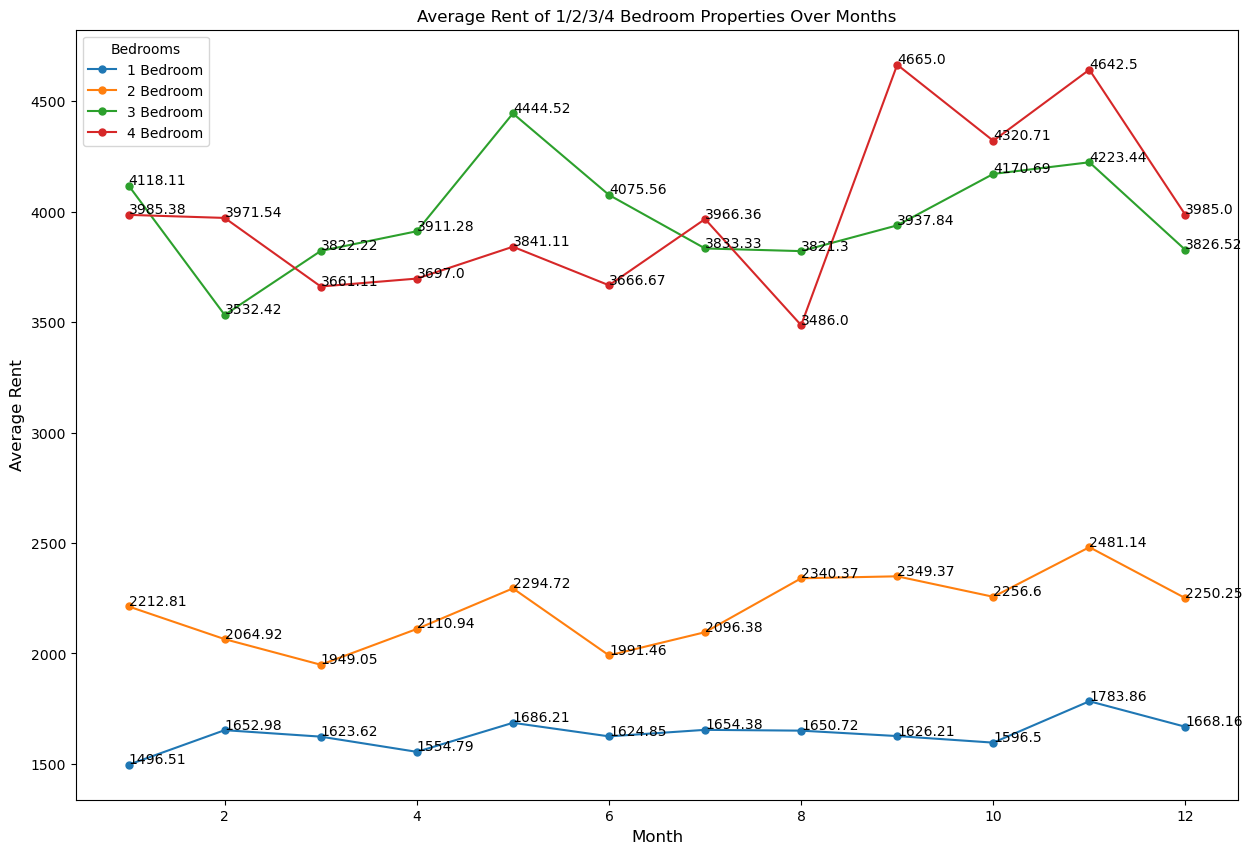

In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))


for i in range(1, len(dfClean["Bedrooms"].unique())):                                           # For loop for number of plots to be generated
    rent = []                                                                                   # Blank list to store average rent values for each type
    month = []                                                                                  # Blank list to store month of property listing
    
    
    for j in range(dfClean.shape[0]):                                                           # Nested for loop to run over all the rows of dataframe
        if ((dfClean.iloc[j, (dfClean.columns.get_loc("Bedrooms"))]) == i):                     # If condition to check the number of rooms in property
            rent.append(dfClean.iloc[j, (dfClean.columns.get_loc("Monthly Rental (EUR)"))])     # Storing rent value in the list
            month.append(dfClean.iloc[j, (dfClean.columns.get_loc("Month"))])                   # Storing months in the list
        month_dtf = pd.to_datetime(month, format="%B").month                                    # Coverting the month values to datetime format
        
        
    plot_df = pd.DataFrame({"Month":month_dtf, "Rent":rent})                           # Creating a temporary dataframe for storing month and rent values
    avgRent_byMonth = plot_df.groupby("Month")["Rent"].mean()                          # Grouping multiple rents in a month by calculating their average


    plt.plot(avgRent_byMonth, marker="o", markersize=5, label=f"{i} Bedroom")          # Plotting the dataframe directly using the pandas and matplotlib
    for month, rent in avgRent_byMonth.items():                                        # Adding plot data labels
        plt.text(month, rent+5,str(round(rent, 2)), fontsize=10)                       # Variables "month", "rent" becomes the coordinates for the labels


    
plt.xlabel("Month", fontsize=12)                                                                # Customizing the plot labels (X-axis)
plt.ylabel("Average Rent", fontsize=12)                                                         # Customizing the plot labels (Y-axis)
plt.title(f"Average Rent of 1/2/3/4 Bedroom Properties Over Months")                                  # Customizing the plot title
plt.legend(title="Bedrooms")
plt.show()                                                                                      # Printing the plot

#### Interpretation:

> Average monthly rent for 1 bedroom listings range from 1496 to 1668 EUR and see relative jumps in February, May and October.

> For 2 bedroom listing, we can see a major upmarking in avg. monthly rent in the month of May, August, September and November.

> 3 and 4 bedroom listings show a highly volatile avg. monthly rental trends and one may match or surpass the other in either direction (high or low).

> We can see a clear seasonality in the monthly average rents for all the 4 categories. As Dublin is home to prominent academic institutions such as Trinity and UCD, the real estate market gets shaped in accordance to the academic calendar, specially so for the 1 and 2 bedroom apartments.

> Upmarking in the month of May could possibly driven by early movers' advantage i.e. students and young professionals who tend to secure a place to live before moving.

> Academic calendar in Dublin begins in September, which is when we see gradual increase in rent for 2 bedroom apartments as academic year draws closer. Since most students prefer sharing rooms and apartments due to budget constraints, this is more evident in 2 bedroom listings. We dont see such a upmarking in 1 bedroom apartments as they might have got occupied early on leading to low availability. There's also a chance that 1 bedroom apartments are overpriced as compared to what they have to offer in terms of condition and amenities. Students looking to share apartment space also drives a jump in 3 and 4 bedrooms apartments too. The jump in 4 bedroom in September is significant as the properties tend to be of better quality and also the high demand low supply dynamic.

> All the four categories of listing see a jump in the month of November as tenants tend to secure or upgrade before colder season and holiday period. The jump is significant as only limited properties are available by this time of the year.

##### Seasonality:

> Clear seasonality is visible in the real estate market of Dublin, driven mostly by the academic calendar and seasons. Tenants are mostly students and young professionals.


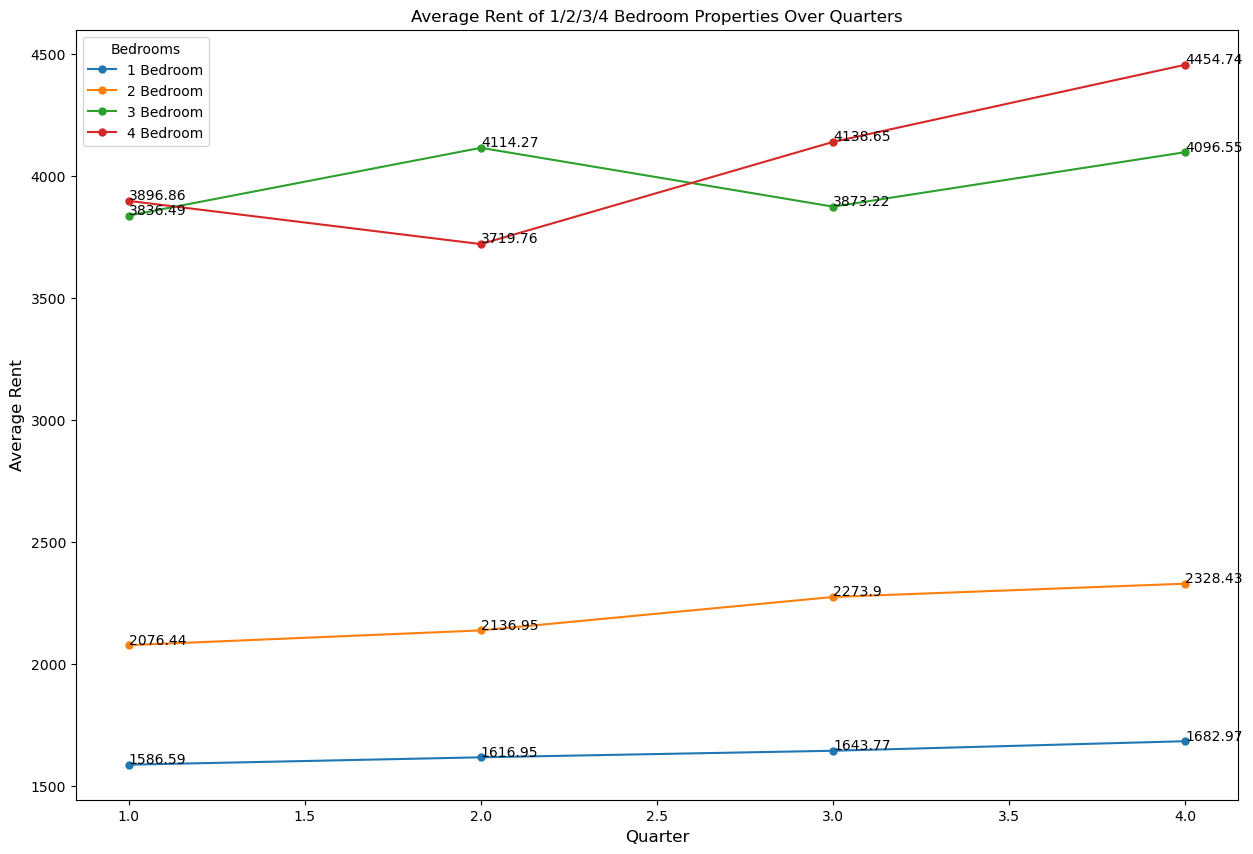

In [12]:
plt.figure(figsize=(15,10))

for i in range(1, len(dfClean["Bedrooms"].unique())):                                           # For loop for number of plots to be generated
    rent = []                                                                                   # Blank list to store average rent values for each type
    quarter = []                                                                                # Blank list to store month of property listing
    
    
    for j in range(dfClean.shape[0]):                                                           # Nested for loop to run over all the rows of dataframe
        if ((dfClean.iloc[j, (dfClean.columns.get_loc("Bedrooms"))]) == i):                     # If condition to check the number of rooms in property
            rent.append(dfClean.iloc[j, (dfClean.columns.get_loc("Monthly Rental (EUR)"))])     # Storing rent value in the list
            quarter.append(dfClean.iloc[j, (dfClean.columns.get_loc("Quarter"))])               # Storing months in the list
        
        
    plot_df = pd.DataFrame({"Quarter":quarter, "Rent":rent})                           # Creating a temporary dataframe for storing month and rent values
    avgRent_byQtr = plot_df.groupby("Quarter")["Rent"].mean()                          # Grouping multiple rents in a month by calculating their average


    plt.plot(avgRent_byQtr, marker="o", markersize=5, label=f"{i} Bedroom")            # Plotting the dataframe directly using the pandas and matplotlib
    for quarter, rent in avgRent_byQtr.items():                                        # Adding plot data labels
        plt.text(quarter, rent+5,str(round(rent, 2)), fontsize=10)                     # Variables "month", "rent" becomes the coordinates for the labels

    
plt.xlabel("Quarter", fontsize=12)                                                     # Customizing the plot labels (X-axis)
plt.ylabel("Average Rent", fontsize=12)                                                # Customizing the plot labels (Y-axis)
plt.title(f"Average Rent of 1/2/3/4 Bedroom Properties Over Quarters")                        # Customizing the plot title
plt.legend(title="Bedrooms")
plt.show()                                                                             # Printing the plot

#### 2) Dearest and Cheapest Postal Districts

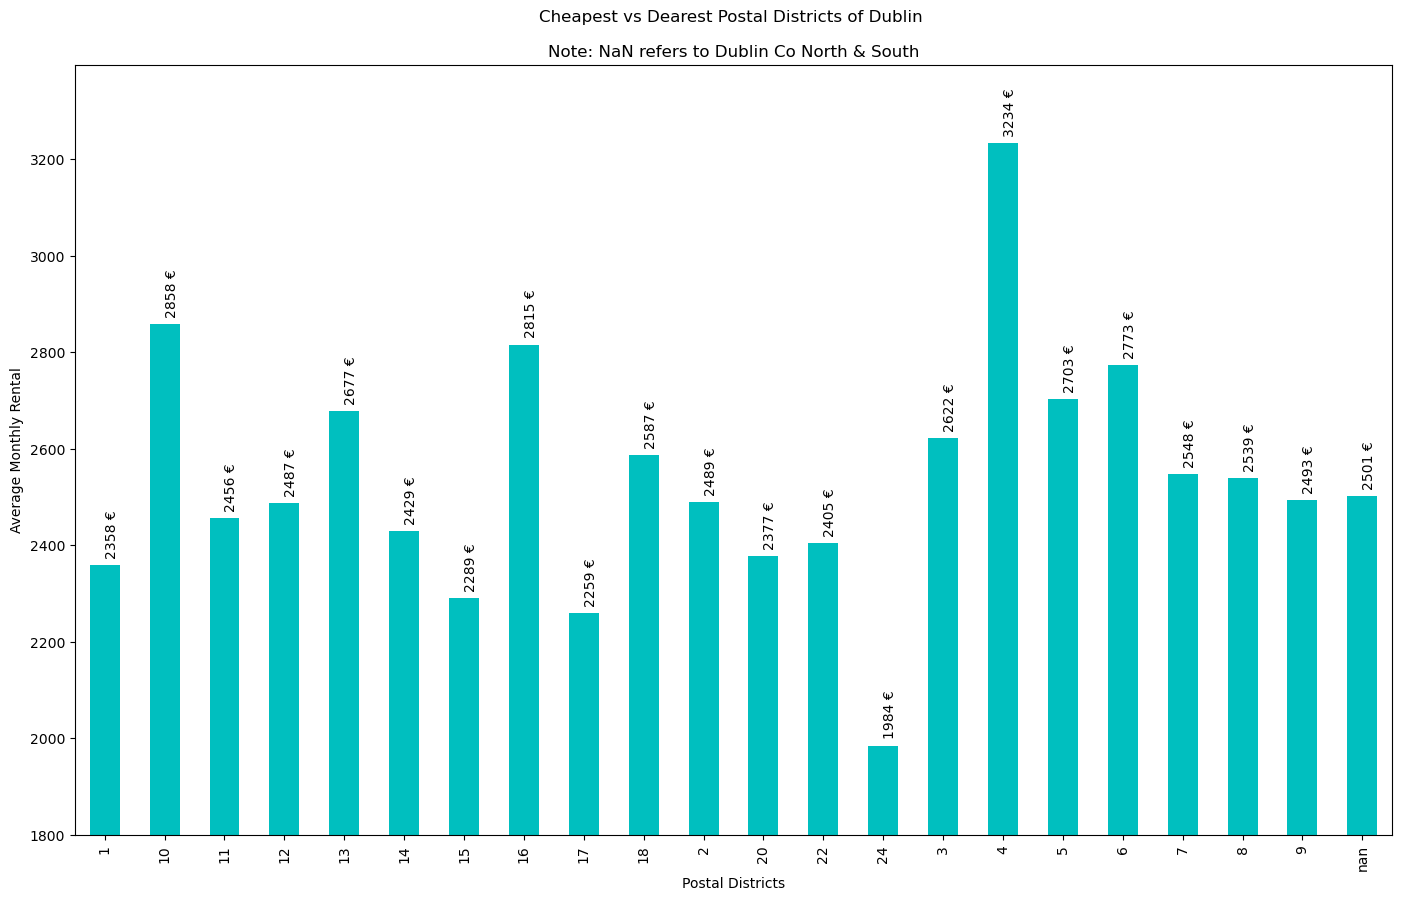

In [13]:

avgRent_byPostDist = (dfClean.groupby("Postal District", dropna=False)                  # Calculating average monthly rental per postal district
                      ["Monthly Rental (EUR)"].mean())


# Plotting the bar graph
plt.figure(figsize=(17,10))
avgRent_byPostDist.plot(kind="bar", color="c")
plt.ylabel("Average Monthly Rental")
plt.xlabel("Postal Districts")
plt.xticks(rotation=90)
plt.ylim(bottom=1800)
for postdist, rent in enumerate(avgRent_byPostDist):
    plt.text(postdist, rent+20, str(round(rent))+" €", rotation=90 )
plt.title("Cheapest vs Dearest Postal Districts of Dublin \n\nNote: " 
            "NaN refers to Dublin Co North & South")
plt.show()

#### Interpretation:

> Different postal districts of Dublin caters to tenants of various income groups.

> Highest avg. monthly rent can be seen in Dublin 4 which includes neighborhoods such as Ballsbridge, Belfield, Donnybrook. This reflects the status of Dublin 4 as the poshest neighborhood to live in. With close proximity to the city center and presence of important landmarks, embassies, institutions and establishments, Dublin 4 tops the chart. 

> Other premium locations include Dublin 10 (Ballyfermot, Cherry Orchard), 16 (Rathfarnham, Dundrum, Sandyford) and 6 (Ranelagh, Rathmines, Rathgar etc) due to gentrification, urban-suburban balance, and proximity to amenities, convenience and connectivity. 

>  Mid range districts include Dublin 7, 8, 9, 11, 14, 18. These areas are not too far from the city center as compared to the extremes and usually offer decent neighborhood environments. These include areas like, Stoneybatter, Smithfield, Kilmainham, Portobello, Rialto, Drumcondra, Leopardstown etc.

> More affordable areas include Dublin 1, 11, 12, 15, 17, 20, 22 with some closer in the heart of the city and others in the suburban Dublin. These include Clondalkin, Newcastle, Liffey Valley, Blanchardstown, Crumlin etc.

> The cheapeast neighborhood is Dublin 24 which includes neighborhoods like Tallaght which is considered more socio-economic diverse and relatively lesser gentrified.

> Other areas in County Dublin are see fairly moderate avg. monthly rental due to their suburban charm.

#### 3) Correlation

In [14]:
leaseRent_corr = dfClean[["Monthly Rental (EUR)", "Lease Duration (Months)", "Bedrooms", "Bathrooms"]].corr()
leaseRent_corr

,Monthly Rental (EUR),Lease Duration (Months),Bedrooms,Bathrooms
Monthly Rental (EUR),1.000000,-0.258001,0.698957,0.256598
Lease Duration (Months),-0.258001,1.000000,-0.110041,-0.041773
Bedrooms,0.698957,-0.110041,1.000000,0.371164
Bathrooms,0.256598,-0.041773,0.371164,1.000000


#### Interpretation:

> Bedrooms have the strongest impact on rent, with a correlation of 0.698957

> Bathrooms have a moderate relationship with both monthly rent and number of bedrooms.

> Lease duration shows a weak negative correlation with monthly rent (-0.258001). This means that longer leases may slightly reduce rent but this is not a very significant trend.

> Bedrooms and bathrooms, show very weak correlations with lease duration. This reflects that neither one of those attributes affects the lease length.

#### 4) Correlation between Features  (Garden, Parking, Bedrooms, Bathrooms) with Rental values

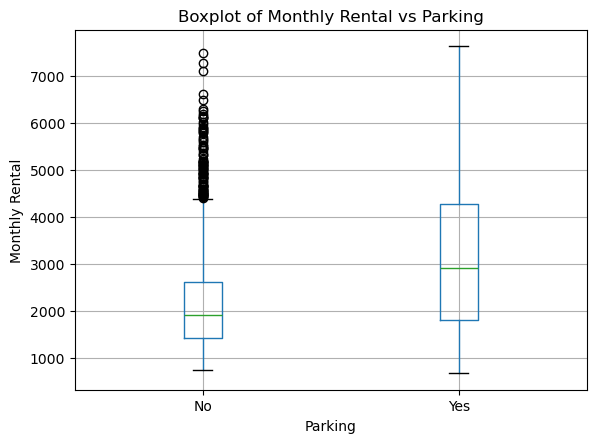

In [15]:
dfClean.boxplot(column='Monthly Rental (EUR)', by='Parking')
plt.title('Boxplot of Monthly Rental vs Parking')
plt.suptitle('')
plt.xlabel('Parking')
plt.ylabel('Monthly Rental')
plt.show()

#### Interpretation:

> Properties with parking have a higher median rent, close to 3000 EUR, while those with none have lower avg. monthly rent nearing 2000 EUR.

> IQR i.e. the middle 50% of the listing with parking have a greater range of monthly rental: ranging from 1800 EUR to 4200 EUR.

> IQR of listings with no parking is significantly limited and have a range of 1500 EUR to 2500 EUR indicating lower rental options.

> Outlier in the listings without parking could mean that there are properties in urban luxury markets and premium rents are driven by location and nearby amenities. 

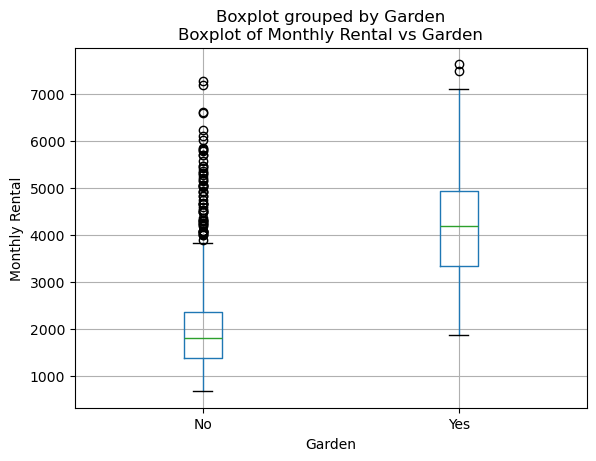

In [16]:
dfClean.boxplot(column='Monthly Rental (EUR)', by='Garden')
plt.title('Boxplot of Monthly Rental vs Garden')
plt.xlabel('Garden')
plt.ylabel('Monthly Rental')
plt.show()

#### Interpretation:

> Properties having a garden have a higher median rent (4200 EUR) and middle 50% have avg monthly rental within a range of 4300 EUR to 5000 EUR

> Listings without a garden have a significantly lower median of approx 1800 EUR and an IQR of 1500 EUR to 2300 EUR

>  Many outliers can be seen here which indicates towards presence of premium listings in luxury markets despite having no garden.

#### 4) Cross Tabulation

In [17]:
crosstab_locBed = pd.crosstab(dfClean["Postal District"], dfClean["Bedrooms"], margins=True, margins_name="Total Rooms Available" )
print(crosstab_locBed)

Bedrooms                 1    2    3    4   5  Total Rooms Available
Postal District                                                     
1                      187  174   67   15   1                    444
10                      16    7   14    4   2                     43
11                      23   20   16   14   0                     73
12                      14   22   12    6   1                     55
13                      14   11   17    4   1                     47
14                      14   17    6    8   1                     46
15                      19   16   12    7   1                     55
16                      14   12   13    5   2                     46
17                      14   18   15    3   1                     51
18                      18   11    9    7   0                     45
2                      174  132   46   14   6                    372
20                      15   15   12    4   1                     47
22                      16   13   

#### Interpretation:

> This cross-tabulation between the property categories and postal district can reveal key availibility information.

> There is a significant concentration of listings in Dublin 1 and 2 indicating they are the prime renal districts. These are followed by Dublin 6.

> Highest number of listings are of 1 and 2 Bedroom apartments/houses.

> Moderate availability of 3 bedroom properties

> Scarcity of bigger rental properties as reflected by 144 and 22 listings only for 4 and 5 bedroom respectively.

> Smaller units make the bulk of the real estate market in Dublin.

In [18]:
crosstab_proptypeBed = pd.crosstab(dfClean["Property Type"], dfClean["Bedrooms"], margins=True, margins_name="Total Rooms Available" )
print(crosstab_proptypeBed)

Bedrooms                 1    2    3    4   5  Total Rooms Available
Property Type                                                       
Apartment              707  598  138    0   0                   1443
House                   23   42  229  151  23                    468
Total Rooms Available  730  640  367  151  23                   1911


#### 5) Multiple Linear Regression

In [19]:
dfClean.select_dtypes(include="number").corr()

,Quarter,Monthly Rental (EUR),Bedrooms,Bathrooms,Lease Duration (Months)
Quarter,1.000000,0.066772,0.007893,0.013846,0.004915
Monthly Rental (EUR),0.066772,1.000000,0.698957,0.256598,-0.258001
Bedrooms,0.007893,0.698957,1.000000,0.371164,-0.110041
Bathrooms,0.013846,0.256598,0.371164,1.000000,-0.041773
Lease Duration (Months),0.004915,-0.258001,-0.110041,-0.041773,1.000000


1528 training examples, 383 test examples

                          Coefficients
Bedrooms                   913.427644
Bathrooms                   10.709747
Lease Duration (Months)    -74.635257


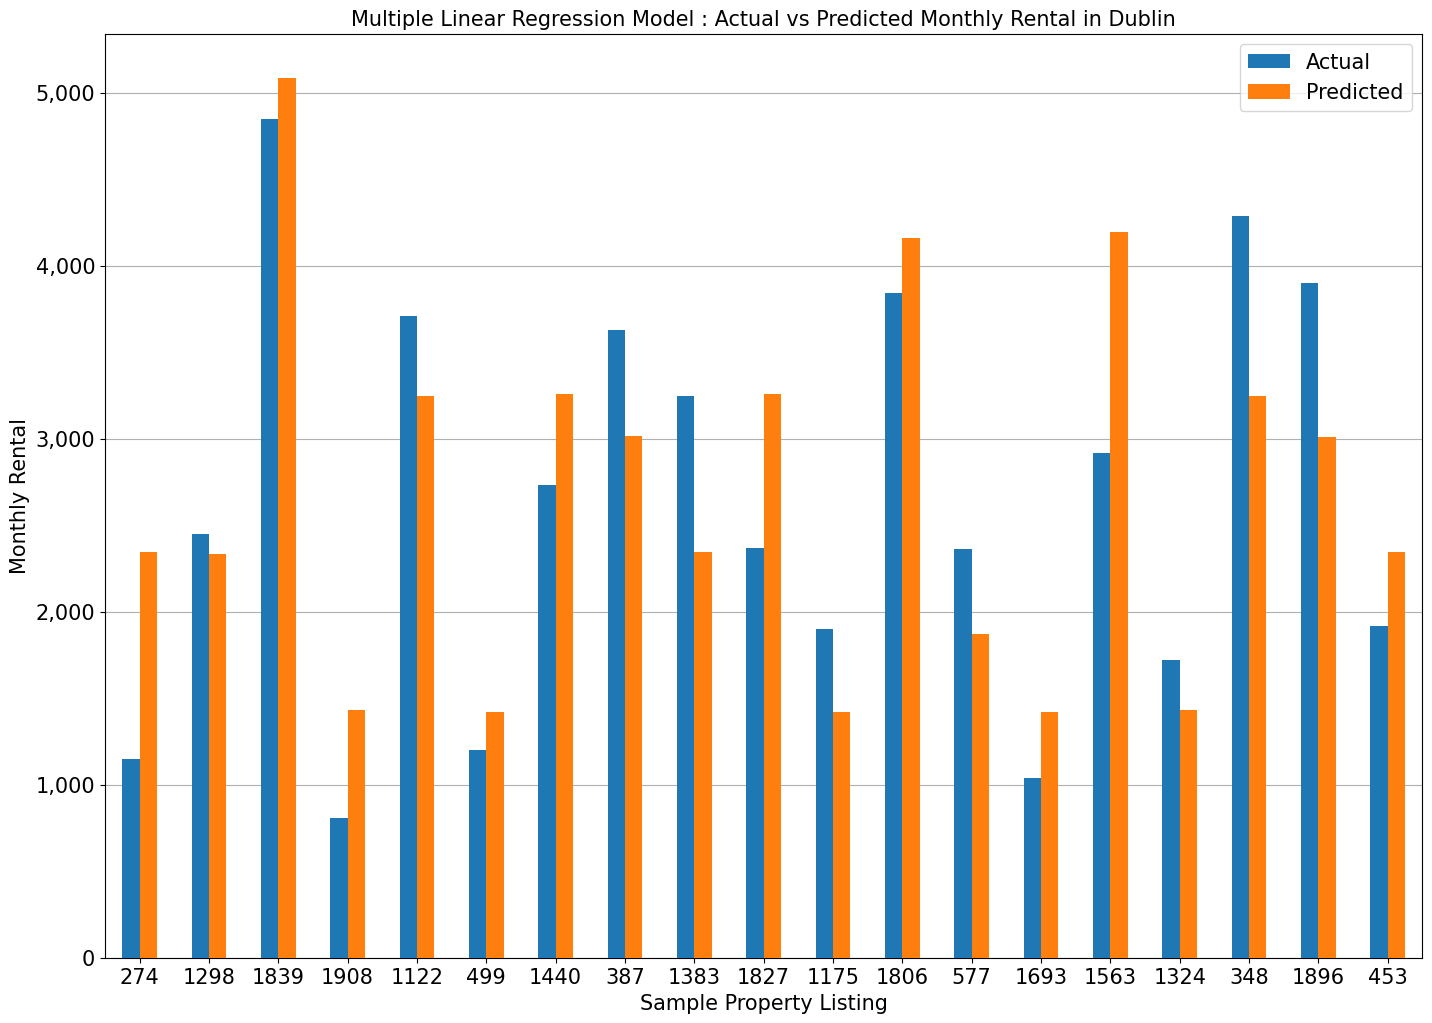

In [31]:
# Importing requisite modules from sklearn package for linear regression, model evaluation, and data splitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Making a copy dataframe
mlr = dfClean.copy()
mlr = mlr.select_dtypes(include="number")                                                        # Keeping only the numeric fields

# Defining X (independent) and Y (Dependent) components for MLR
x = mlr.drop(["Quarter", "Monthly Rental (EUR)"], axis=1)                                        # Dropping the fields that are not required
y = mlr["Monthly Rental (EUR)"]

# Splitting the data into Training Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)                       # Defining train and test split (80% Train, 20% Test)
print(f"{x_train.shape[0]} training examples, {x_test.shape[0]} test examples")

# Building the model
model = LinearRegression()
m = model.fit(x_train, y_train)                                                                  # Fitting the model

# Coefficients of the model (3 independent variables)
print("\n", pd.DataFrame(model.coef_, x.columns, columns=['Coefficients']))                      # Checking the coefficient of the independent variables

# Predictions for the testing data
y_pred = model.predict(x_test)                                                                   # Predicting for the test items

# Comparing the predicted rental against original
df_comparison = pd.DataFrame({"Actual": y_test, "Predicted":y_pred.flatten()})                   # Creating a Predicted vs Actual Rental Dataframe
df_sample = df_comparison.sample(frac=0.05, random_state=78)                              # Taking a sample of the test dataset for plotting convenience

# Plotting the Actual vs Predicted cross check
ax = df_sample.plot(kind="bar", figsize=(17, 12), fontsize=15, zorder=3, rot=0)
ax.legend(fontsize=15)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_xlabel("Sample Property Listing", fontsize=15)
ax.set_ylabel("Monthly Rental", fontsize=15)
ax.set_title("Multiple Linear Regression Model : Actual vs Predicted Monthly Rental in Dublin", fontsize=15)
plt.show()

In [21]:
# Checking the MSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE = {rmse:.2f}")

RMSE = 897.87


#### Interpretation:

> This model uses three numerical attributes of a rental listing in Dublin, namely, Bedrooms, Bathrooms and Lease Duration

> Coefficients: Bedrooms positively affect the rent with a coeff. of 909.732353. Bathrooms affects positively but not signinficantly with a coeff of 26.053345. Whereas lease duration has a negative relationship with the rent with coeff of -64.802208 but it isnt very significant either.

> Root Mean Squared Error of **927.38 EUR** is substantial and tells us that merely these listing and property attributes cannot explain the variation in the rental amount of properties.

> There are potential missing factors in the model such as location, property condition, seasonal factor, connectivity etc.

> Even though we have the location dataset, the degree of impact has yet not been established numerically to include in such a regression model. 

### Challenges

**Data Cleaning:** 
> The data in its original format upon inspection using **df.isna.any()** did not reflect any missing values though there were plenty.

> The data needed to be transformed for those missing values to reflect in analysis.

> Numeric data needed to be collected from string using Regular Expression (RegEx). This reflected real world noisy data complexity

> Few missing data were in various non recognizable format such as "???". Hence, they were needed to be converty in <NA> or NaN format to be analysed correctly.

**Scraping**
> Identification of appropriate html element to target. This was solved using inspect feature of web browsers.

> Pagination of data was particulary hard to crack

### Summary

**Note** : These summaries are derived from all of the above interpretations

> Location and Number of Bedrooms are the biggest driving factors of the rental amount of a listing

> Rental market reflects high seasonality in Dublin city. Peaking in accordance to academic calendar. Other significant factors are change of season and possibly due to tourism.

> This seasonality indicates that tenants are mostly of a younger age group. Students or yound professionals.

> Dublin 4 is the most expensive and Dublin 24 is the cheapest district.

> A basic regression model using bedrooms, bathrooms, and lease duration yields a high RMSE (~€900), indicating the need for more features like location or property condition.

> A linear regression model cannot be used to predict the rent prices of properties in Dublin for future years.

### Further Analysis

> Including the geospatial coordinates of properties could unravel spatial trends further more.

> A more complex time-series regression models like ETS (Error, Trend and Seasonality) or SARIMA (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) could be used to predict the growth in average monthly rental prices in Dublin.

> Accessibility to amenities could be done by incorporating more data such as schools, hospitals, public transport etc.

Index(['Bedrooms', 'Bathrooms', 'Lease Duration (Months)'], dtype='object')